### Define Problem:
**Pima Indians Diabetes Database**


Predict the onset of diabetes based on diagnostic measures
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of **Pima Indian heritage**.

**Attribute Information:**

Number of times pregnant

Plasma glucose concentration a 2 hours in an oral glucose tolerance test

Diastolic blood pressure (mm Hg)

Triceps skin fold thickness (mm)

2-Hour serum insulin (mu U/ml)

Body mass index (weight in kg/(height in m)^2)

Diabetes pedigree function

Age (years)

Class variable (0 or 1)

**CRISP-DM**

![CRISP-DM](CRISP-DM.jpg)

CRISP-DM: Defined to standardize a data mining process across industries, **CR**oss-**I**ndustry **S**tandard **P**rocess for Data Mining (CRISP-DM) is the most well-known framework used to define a data science workflow. As shown in the standard **CRISP-DM** visual workflow, it describes six iterative phases.

`Each phase (Business understanding, data understanding, data preparation, modeling, evaluation and deployment)`

has its own defined tasks and set of deliverables such as documentation and reports. Each phase has its own defined tasks and set of deliverables (including documentation and reports). Projects can “loop back” as needed to a previous phase.

In [1]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

py.init_notebook_mode(connected=True)

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Always good to set a seed for reproducibility
SEED = 9
np.random.seed(SEED)

## Data Prepairation

In [3]:
# Loading Data
df = pd.read_csv('diabetes.csv')
# Getting dataframe columns names
df_name = df.columns
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Analyse Data**

Descriptive Staticstics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Data Visualization**

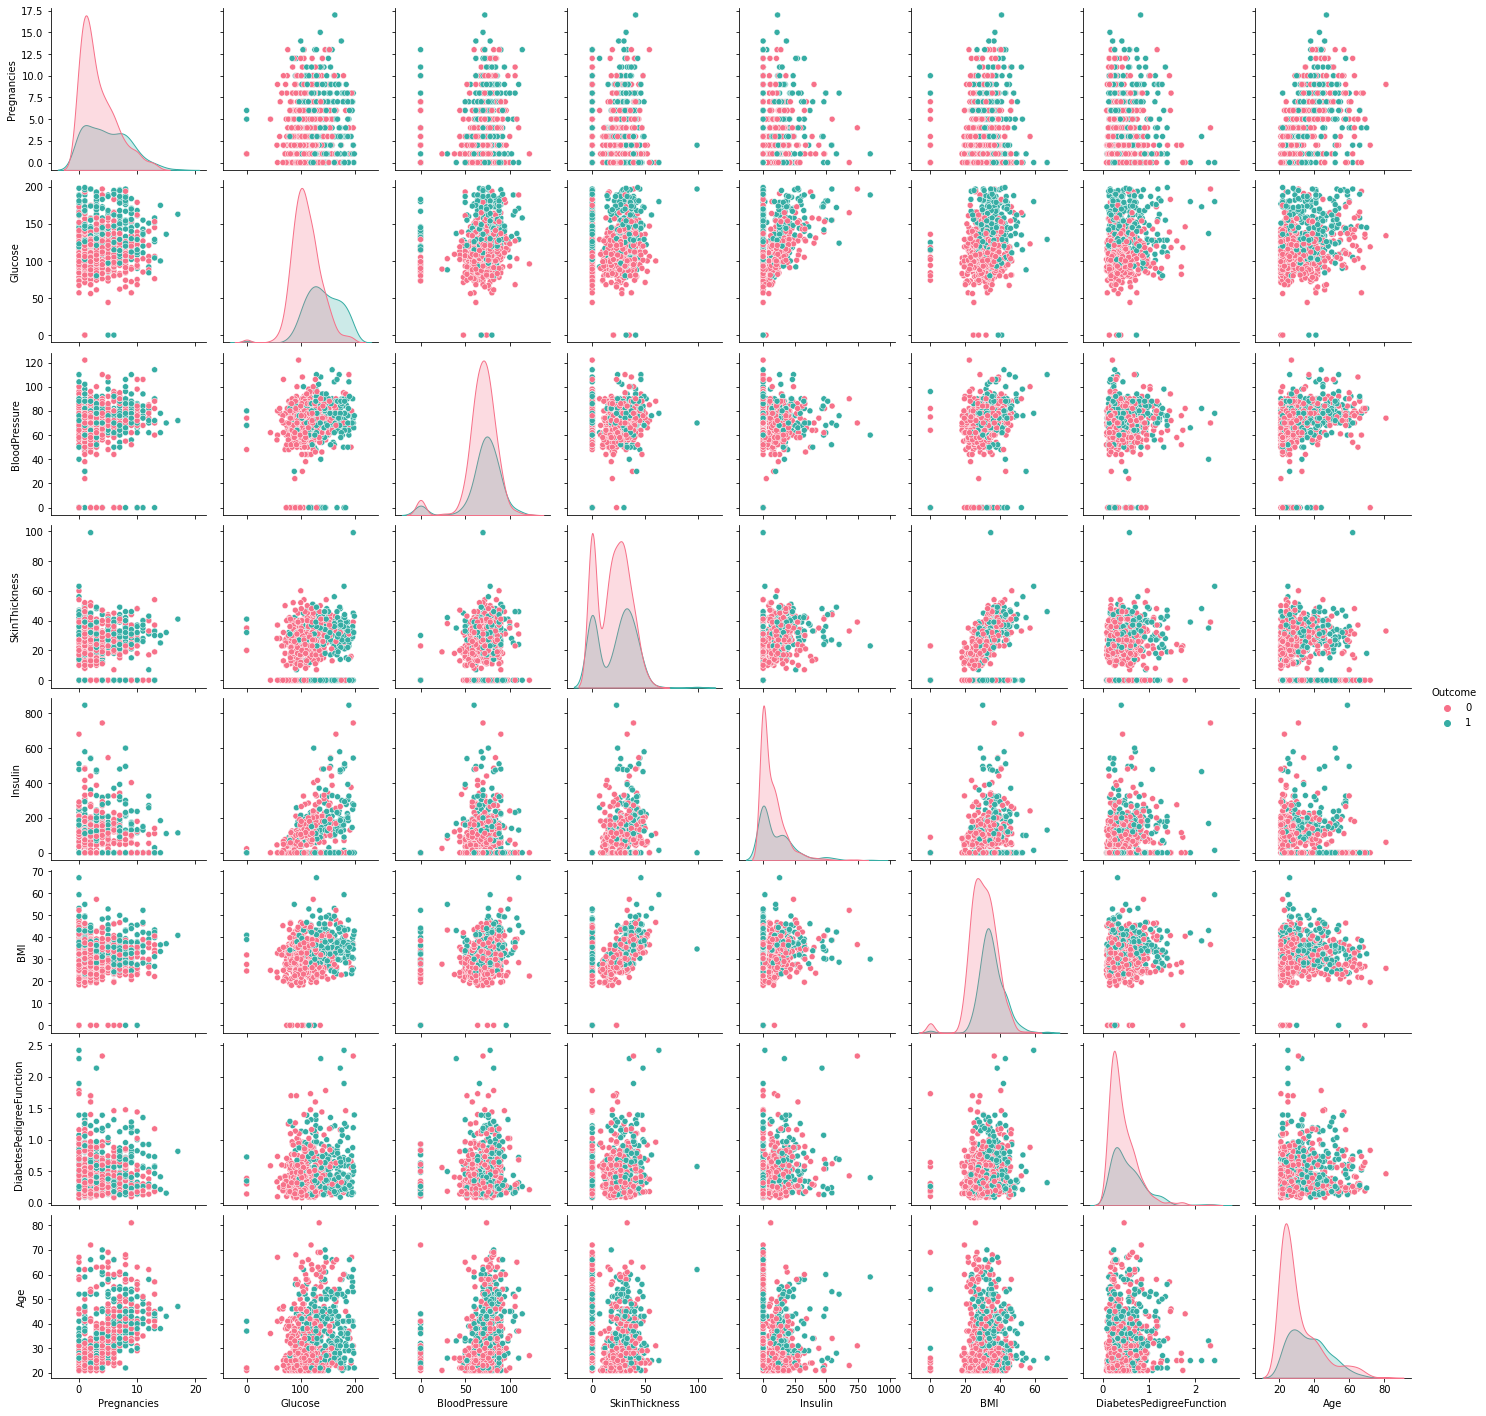

In [6]:
g = sns.pairplot(df, hue="Outcome", palette="husl")

It seems that the data suffer from outliers

In [7]:
def PlotPie(df, nameOfFeature):
    labels = [
        str(df[nameOfFeature].unique()[i])
        for i in range(df[nameOfFeature].nunique())
    ]
    values = [
        df[nameOfFeature].value_counts()[i]
        for i in range(df[nameOfFeature].nunique())
    ]

    trace = go.Pie(labels=labels, values=values)

    py.iplot([trace])


PlotPie(df, 'Outcome')

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

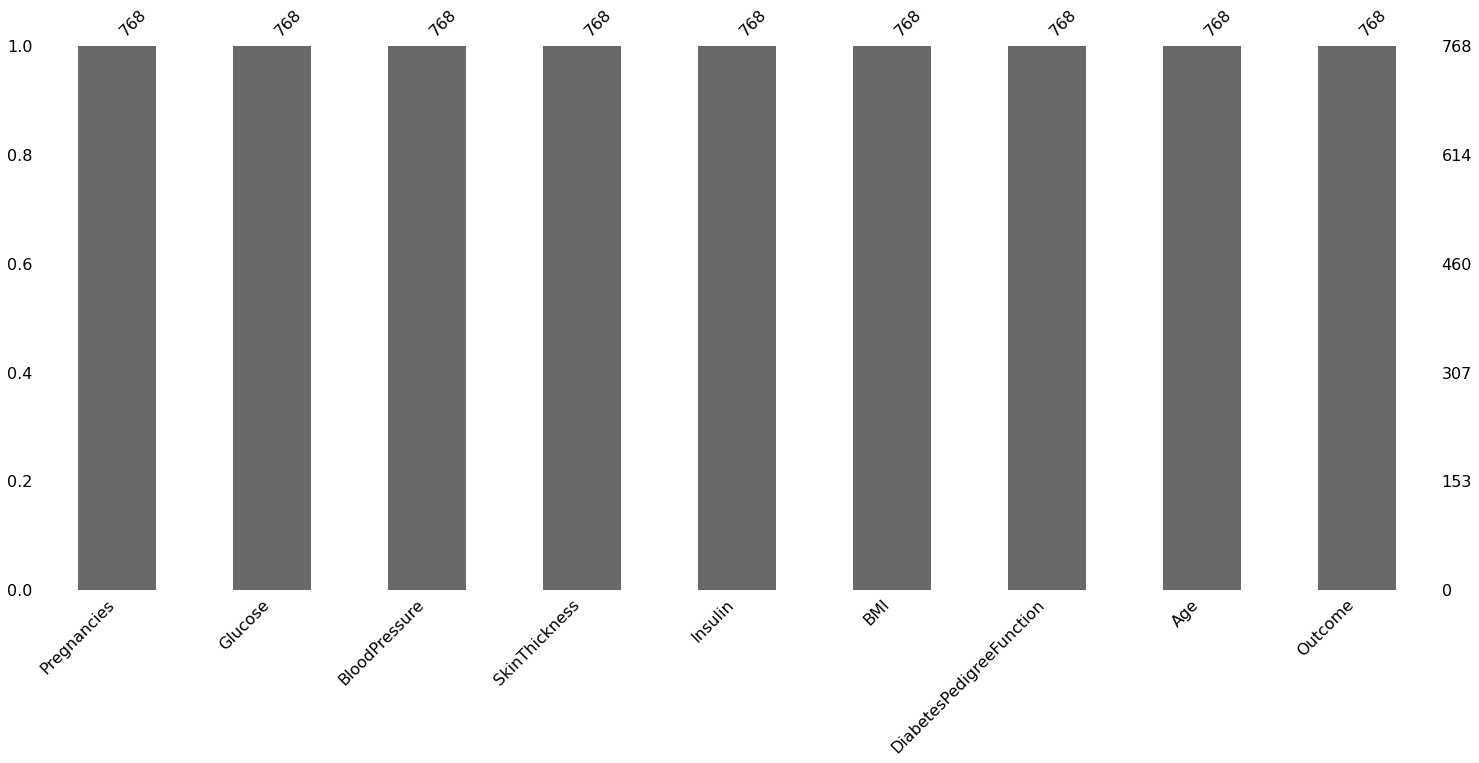

In [8]:
# null count analysis
import missingno as msno

p = msno.bar(df)

Heatmap for data

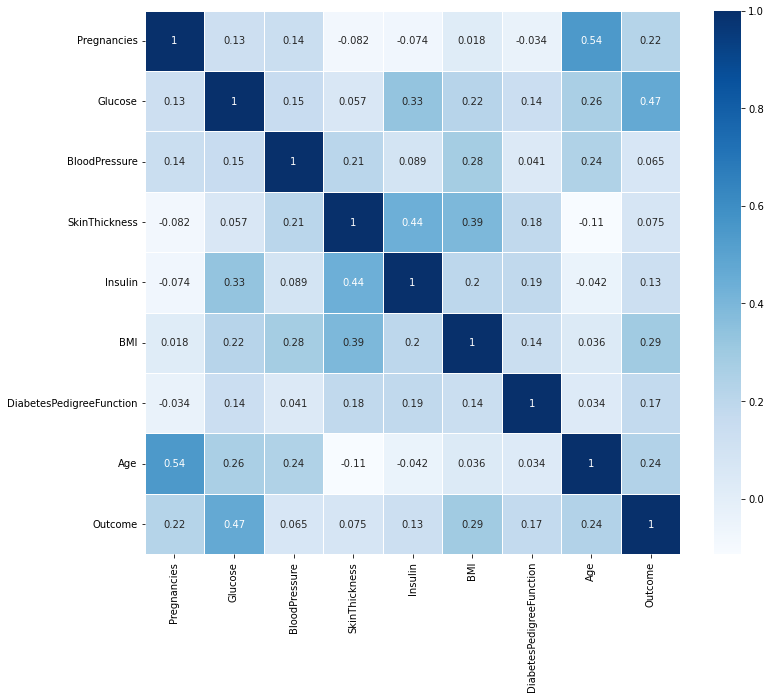

In [9]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=.5)

Outliers investigation & Removal

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
from scipy import stats

df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,688.0,3.845930,3.279256,0.000,1.000,3.00,6.0000,13.000
Glucose,688.0,120.293605,30.005790,44.000,99.000,115.00,139.0000,199.000
BloodPressure,688.0,72.345930,12.312859,24.000,64.000,72.00,80.0000,122.000
SkinThickness,688.0,20.787791,15.405391,0.000,0.000,23.00,32.0000,60.000
Insulin,688.0,72.507267,90.106939,0.000,0.000,43.50,126.0000,415.000
BMI,688.0,32.209157,6.618891,18.200,27.400,32.00,36.3000,55.000
DiabetesPedigreeFunction,688.0,0.454555,0.284527,0.078,0.245,0.37,0.6055,1.461
Age,688.0,33.094477,11.436990,21.000,24.000,29.00,40.0000,68.000
Outcome,688.0,0.329942,0.470534,0.000,0.000,0.00,1.0000,1.000


In [13]:
df_name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

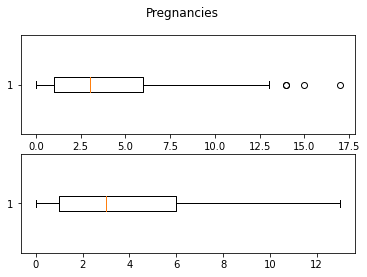

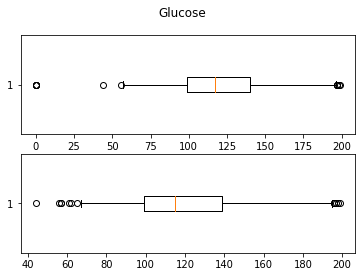

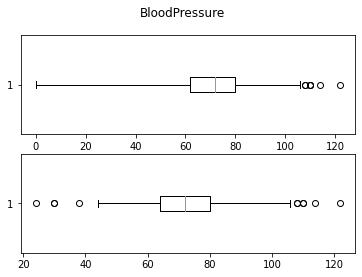

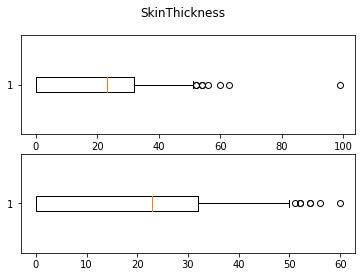

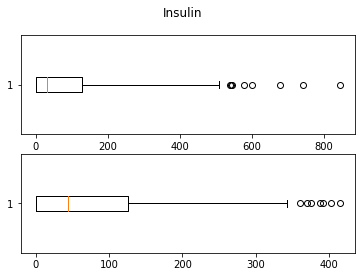

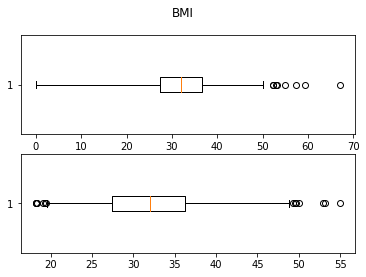

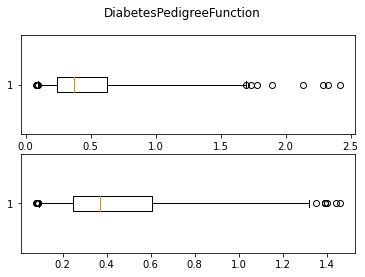

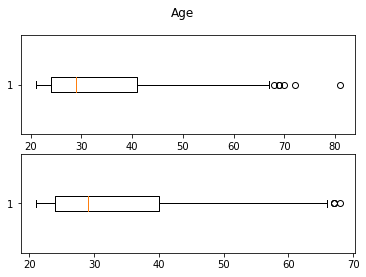

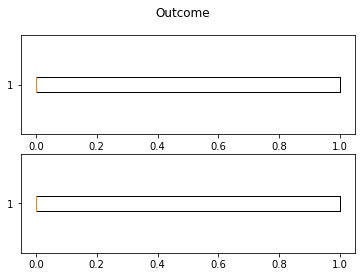

In [14]:
for x in df_name:
    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle(x)
    ax1.boxplot(df[x], whis=[1, 99], vert=False)
    ax2.boxplot(df_clean[x], whis=[1, 99], vert=False)
    plt.show()

Model Scaling

In [15]:
# Load libraries

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
# MinMaxScalar
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = df_clean

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)

print(scaled)

[[0.46153846 0.67096774 0.48979592 ... 0.39696312 0.61702128 1.        ]
 [0.07692308 0.26451613 0.42857143 ... 0.19739696 0.21276596 0.        ]
 [0.61538462 0.89677419 0.40816327 ... 0.42950108 0.23404255 1.        ]
 ...
 [0.38461538 0.49677419 0.48979592 ... 0.12075199 0.19148936 0.        ]
 [0.07692308 0.52903226 0.36734694 ... 0.19595083 0.55319149 1.        ]
 [0.07692308 0.31612903 0.46938776 ... 0.17136659 0.04255319 0.        ]]


In [17]:
scaled_df = pd.DataFrame(scaled,
                         columns=[
                             'Pregnancies', 'Glucose', 'BloodPressure',
                             'SkinThickness', 'Insulin', 'BMI',
                             'DiabetesPedigreeFunction', 'Age', 'Outcome'
                         ])
scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.670968,0.489796,0.583333,0.000000,0.418478,0.396963,0.617021,1.0
1,0.076923,0.264516,0.428571,0.483333,0.000000,0.228261,0.197397,0.212766,0.0
2,0.615385,0.896774,0.408163,0.000000,0.000000,0.138587,0.429501,0.234043,1.0
3,0.076923,0.290323,0.428571,0.383333,0.226506,0.269022,0.064353,0.000000,0.0
4,0.384615,0.464516,0.510204,0.000000,0.000000,0.201087,0.088937,0.191489,0.0
...,...,...,...,...,...,...,...,...,...
683,0.769231,0.367742,0.530612,0.800000,0.433735,0.399457,0.067245,0.893617,0.0
684,0.153846,0.503226,0.469388,0.450000,0.000000,0.505435,0.189443,0.127660,0.0
685,0.384615,0.496774,0.489796,0.383333,0.269880,0.217391,0.120752,0.191489,0.0
686,0.076923,0.529032,0.367347,0.000000,0.000000,0.323370,0.195951,0.553191,1.0


Feature Importance

In [18]:
scaled_df_name = scaled_df.columns
X_c = scaled_df[scaled_df_name[0:8]]
Y_c = scaled_df[scaled_df_name[8]]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_c, Y_c, test_size=0.25, random_state=0, stratify=scaled_df['Outcome'])

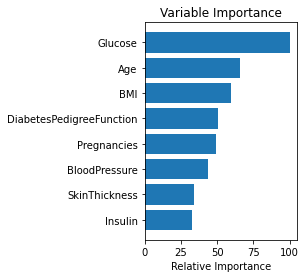

In [19]:
clf = ExtraTreesClassifier(n_estimators=500, random_state=0)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])  #boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Here we can see that important features are the values having relative importance more than 50%

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

Selecting important Variables

In [21]:
df_feature_imp = scaled_df[[
    'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Outcome'
]]

In [22]:
df_feature_imp_name = df_feature_imp.columns

In [24]:
X = df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1] - 1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1] - 1]]
X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(
X, Y, test_size=0.1, random_state=0, stratify=df_feature_imp['Outcome'])

In [25]:
X = X_train_im
y = y_train_im

In [26]:
X

,Glucose,BMI,Age,DiabetesPedigreeFunction
90,0.264516,0.581522,0.127660,0.616052
41,0.380645,0.567935,0.212766,0.192336
61,0.612903,0.282609,0.106383,0.240781
562,0.374194,0.442935,0.063830,0.115691
147,0.670968,0.388587,0.021277,0.128706
...,...,...,...,...
604,0.496774,0.483696,0.085106,0.035430
186,0.238710,0.258152,0.085106,0.153290
527,0.438710,0.576087,0.063830,0.070137
489,0.464516,0.250000,0.000000,0.091106


In [27]:
y

90     0.0
41     1.0
61     0.0
562    0.0
147    0.0
      ... 
604    1.0
186    0.0
527    0.0
489    0.0
231    1.0
Name: Outcome, Length: 619, dtype: float64

Logistic Regression (Hyperparameter Tunning)

In [28]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'dual': [False, True],
    'C': [x for x in np.arange(1, 10, 1)],
    'fit_intercept': [True, False],
    'intercept_scaling': [1, 0],
    'class_weight': [x for x in np.arange(1, 10 + 1, 1)],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [x for x in np.arange(100, 200 + 1, 10)],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'warm_start': [True, False],
    'l1_ratio': [x for x in np.arange(0, 1 + 1, .1)]
}
mdl = LogisticRegression(n_jobs=-1)
skfold = StratifiedKFold(n_splits=10)
Rds_cv = RandomizedSearchCV(mdl,
                            param_grid,
                            cv=skfold,
                            n_jobs=-1,
                            n_iter=10,
                            random_state=0)
Rds_cv.fit(X, y)

print("Best Score:" + str(Rds_cv.best_score_))
print("Best Parameters: " + str(Rds_cv.best_params_))
LogR = Rds_cv.best_params_

Best Score:0.7901110523532522
Best Parameters: {'warm_start': False, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'max_iter': 100, 'l1_ratio': 1.1, 'intercept_scaling': 0, 'fit_intercept': True, 'dual': False, 'class_weight': 7, 'C': 4}


Putting Best Values in the Model

In [29]:
model = LogisticRegression(warm_start=False,
                           solver='saga',
                           penalty='l1',
                           multi_class='ovr',
                           max_iter=100,
                           l1_ratio=1.1,
                           intercept_scaling=0,
                           fit_intercept=True,
                           dual=False,
                           class_weight=7,
                           C=4,
                           n_jobs=-1,
                           random_state=SEED)
model.fit(X, y)

LogisticRegression(C=4, class_weight=7, intercept_scaling=0, l1_ratio=1.1,
                   multi_class='ovr', n_jobs=-1, penalty='l1', random_state=9,
                   solver='saga')

Model Evaluation

Accuracy Score

In [30]:
# accuracy score on the training data
X_train_prediction = model.predict(X)
training_data_accuracy = accuracy_score(X_train_prediction, y)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7932148626817448


In [31]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test_im)
test_data_accuracy = accuracy_score(X_test_prediction, y_test_im)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7681159420289855


predictive system

In [32]:
input_ = np.asarray([0.264516, 0.581522, 0.127660, 0.616052]).reshape(1, -1)
print('Diabetic' if model.predict(input_) == 1 else 'Not Diabetic')

Not Diabetic


Here system has predicted that the person has no diabetes based on `Glucose`,`BMI`,`Age`&`DiabetesPedigreeFunction` 